# 평가 - 성능 평가 지표 

머신러닝 프로세스
- 데이터 가공/변환
- 모델 학습/예측
- 평가

앞의 타이타닉 생존자 예제에서는 
- 모델 예측 성능의 평가를 위해 정확도(Accuracy) 이용
- 머신러닝에서 여러 가지 예측 성능 평가 방법 사용
- 분류/회귀에 따라 여러 종류 있음



분류 유형

이진 분류
- 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결과값만 가지는 분류

멀티 분류
- 여러 개의 결정 클래스 값을 가지는 분류


분류의 성능 평가 지표
- 정확도 (Accuracy)
- 오차행렬 (Confusion Matrix)
- 정밀도 (Precision)
- 재현율 (Recall)
- F1 score 
- ROC AUC

이진/멀티 분류에 모두 적용되는 지표이지만
이진 분류에서 더 중요하게 강조되는 지표

## 정확도 (Accuracy)
- 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
- 정확도 (Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
- 직관적으로 모델 예측 성능을 나타내는 평가 지표 
- 그러나 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 
- 정확도 수치 하나만 가지고 성능을 평가하지 않음
- 특히, 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 평가할 경우
- 적합한 지표가 아님


정확도 지표가 왜 ML모델의 성능을 왜곡하는 예
- 타이타닉 예제 수행 결과 정확도의 결과가 80%대 였지만
- 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 
- 별다른 알고리즘 적용 없이 
- 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측해도 
- 이와 비슷한 수치가 나올 수 있음.
- 알고리즘 성능이 좋지 않더라도 
- 단지 성별 조건 하나만을 가지고도 높은 정확도를 나타내는 상황이 발생 할 것.


정확도 지표가 ML 모델의 성능을 왜곡하는 예
(1) 타이타닉 생존자 예측
(2) MNIST 데이터세트

In [1]:
# 정확도 지표가 ML 모델의 성능을 왜곡하는 예
# fit() : 아무것도 수행하지 않고
# predict() : 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

# 아무런 학습도 하지 않고 성별에 따라 생존자를 예측하느
# 단순한 Classifier 생성
# BaseEstimator를 상속 받음
class MyDummyClassifier(BaseEstimator):
    # fit() : 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    
    # predict() : 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1)) # 예측갓 초기화: 2차원 형태(, 1)
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: # '남자'인 경우
                pred[i] = 0   # 사망
            else:
                pred[i] = 1
        
        return pred

In [4]:
### MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

In [5]:
# 타이타닉 데이터 전처리 함수 (머신러닝06에서 작성했음)


from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫 문자만 추출
    
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 위에서 만든 모든 함수를 한 번에 호출해서 사용하기 위한
# 함수 작성
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [6]:
# 타이타닉 생존자 예측

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습/테스트 데이터 세트로 분할
titanic_df=pd.read_csv('data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

# 위에서 생성한 MyDummyClassifier를 이용하여 학습/예측/평가 수행
my_clf = MyDummyClassifier()
my_clf.fit(X_train, y_train)
pred = my_clf.predict(X_test)

print('Dummy Classifier의 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

Dummy Classifier의 정확도 : 0.8324


단순한 알고리즘으로 예측을 하더라도
데이터의 구성에 따라 정확도 결과는 83.24%로
상당히 높은 수치가 나올 수 있기에
정확도를 평가 지표로 사용할 때는 매우 신중해야 함
특히, 정확도는 불균형한 레이블 값 분포에서 ML모델의 성능을 판단할 경우
정확한 지표가 아님 

In [ ]:
# 정확도 지표가 ML 모델의 성능을 왜곡하는 예2
유명한 MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에
# 정확도 지표 적용 시 어떤 문제가 발생하는지 확인


In [ ]:
MNIST 데이터 세트 
- 0 ~ 9 까지 숫자 이미지의 픽셀 정보를 가지고 있고 
- 이를 기반으로 숫자 Digit을 예측하는 데 사용
- 사이킷런의 load_digits() API를 통해 MNIST 데이터 세트 제공

In [ ]:
# 그림


In [ ]:
이진 분류 문제로 변환
- 불균형한 데이터 세트로 변형
- 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환
- True : 전체 데이터의 10%
- False : 90% 
    
모든 데이터를 False, 즉 0으로 예측하는 Classifier를 이용해서 
- 정확도를 측정하면 90%에 가까운 예측 정도를 나타냄

정확도 평가 지표의 맹점
- 아무거도 하지 않고 무조건 특정한 결과로 찍어도
- 데이터가 균일하지 않은 경우 높은 수치가 나타날 수 있음


In [32]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd


In [38]:

class MyFakeClassifier(BaseEstimator) :
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# 데이터 로드
digits = load_digits()

print(digits.data)
print('digits.data.shape : ', digits.data.shape)

print(digits.target)
print('digits.target.shape : ', digits.target.shape)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digits.data.shape :  (1797, 64)
[0 1 2 ... 8 9 8]
digits.target.shape :  (1797,)


In [39]:
### 참고
a=digits.target[:10]
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
### 참고
a==7

array([False, False, False, False, False, False, False,  True, False,
       False])

In [41]:
### 참고
b = (a==7).astype(int)
b

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [42]:
# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환
# 7번이 아니면 False이고, 0으로 변환
y=(digits.target==7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y=(digits.target==7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
#학습/테스트 데이터 세트로 분리
#test_size 설정 안 했음 (디폴트 : 25%)
X_train,X_test,y_train,y_test=train_test_split(digits.data, y, random_state=11)


In [45]:
X_train.shape

(1347, 64)

In [46]:
X_test.shape  #450/1347(25%)

(450, 64)

In [47]:
#불균형한 레이블 데이터 분포도 확인

print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [50]:
# MyFakeClassifier로 학습/예측/정확도 평가
fake_clf=MyFakeClassifier()
fake_clf.fit(X_train,y_train)
fakepred=fake_clf.predict(X_test)

print('정확도 : {0:.3f}'.format(accuracy_score(y_test,fakepred)))


# 모든 예측을 0으로 해도 정확도가 90%

정확도 : 0.900


단순히 predict()의 결과를 np.zeros()로 모두 0값으로 반환함에도 불구하고
450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%
단지 모든 것을 0으로만 예측해도 
MyFakeClassifier의 정확도가 90%

우수한 ML알고리즘과 동등한 성능이란 것은 말도 안되는 결과 

이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는
성능 평가 수치로 사용해서는 안 됨. 

정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 
여러 가지 분류 지표와 함께 적용해야 함.

## 오차행렬 (Confusion Matrix)

오차행렬 (Confusion Matrix)
- 분류의 성능을 평가하는 행렬
- 실제로 참(True)인지 거짓(False)인지 
- 예측을 긍정(Positive)으로 했는지, 부정(Negative)로 했는지에 따라
- 4개의 경우의 수로 구분한 표 
- 4분면 행렬에서 예측 클래스와 실제 클래스의 값 유형에 따라 TN, FP, FN, TP 형태
- 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(Confused) 있는지도 함께 보여주는 지표

머신러닝에서 오차행렬이 중요한 이유
- 머신러닝 모델의 예측이 얼마나 잘 한 예측인지를 판단하는 중요한 기준을 제공해주기 때문에
- 오차행렬로부터 머신러닝 모델의 우수성을 평가하는 다른 여러지표들을 도출

In [ ]:
그림14

TN,TP,FN,TP는 예측 클래스와 실제 클래스의
- Positive 결정값(1)과 Negative(0)의 결합에 따라 결정
- 앞 문자 T/F(True/False) : 예측값과 실제값이 '같은가/틀린가'의미
- 뒤 문자 N/P(Negative/Positive) : 예측 결과 값이 부정(0)/긍정(1)의 의미 
- 예 : TN(True Negative)
    - 앞 True : 예측 클래스 값과 실제 클래스 값이 같다는 의미 
    - 뒤 Nagetive : 예측 값이 Negative 값이라는 의미 

사이킷런은 오차행렬을 구하기 위해 confusion_matrix() API 제공 
앞의 예제 MyFakeClassifier의 예측 성능 지표를 오차행렬로 표현
MyFakeClassifier의 예측 결과인 fake_pred와 실제 결과인 y_test를 
confusion_matrix()의 인자로 입력해 
오차행렬 배열 형태로 출력(반환)

In [53]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(실제값, 예측값)
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

결과  
[[TN, FP],  
 [FN, TP]]

MyFakeClassifier는 load_digits()에서 target=7인지 아닌지에 따라  
클래스 값을 True/False 이진 분류로 변경한 데이터 세트를 사용해서  
무조건 Negative로 예측하는 Classifier였고  
테스트 데이터 세트의 클래스 값 분포는 0이 450건, 1이 45건 이었음  

* TN : 전체 450건 데이터 중 무조건 Negative 0으로 예측해서 True가 된 결과 405건
    - 실제값/예측값 동일, Negative로 예측  
* FP : Positive 1로 예측한 건수가 없으므로 0건
    - 실제값/예측값 다름, Positive로 예측  
* FN : Positive 1인 건수 45건을  Negative 0으로 예측해서 False가 된 결과 45건
    - 실제값/예측값 다름, Negative로 예측  
* TP : Positive 1로 예측한 건수가 없으므로 0건
    - 실제값/예측값 동일, Positive로 예측


In [ ]:
# 그림17

In [ ]:
TN, FP, FN, TP 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보 제공
이 값을 조합해서 Classifier의 성능을 측정할 수 있는 주요 지표인
정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 값을 알 수 있음


In [ ]:
오차행렬 상에서 정확도 
- 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 
- (TN+TP) / (TN,FP,FN,TP)

In [ ]:
일반적으로 불균형한 레이블 클래스 가지는 이진 분류 모델에서는 
- 많은 데이터 중에서 중점적으로 찾아야 하는 아주 적은 수의 결과값에 Positive를 설정해서 1값을 부여하고
- 그렇지 않은 경우는 Negative로 0을 부여하는 경우가 많다. 

예1 : 사기 행위 예측 모델
- 사기 행위 : Positive 양성으로 1값 부여
- 정상 행위 : Negative 음성으로 0 값 부여
    
예2 : 암 검진 모델
- 양성 : Positive 양성으로 1 값 부여
- 음성 : Negative 음성으로 0 값 부여

        

In [ ]:
불현형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에
데이터에 기반한 ML 알고리즘은
Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생

10,00 건의 데이터 세트에서 9,900건이 Negative이고 100건이 Positive라면
Negative로 예측하는 경향이 강해져서 TN 확률이 매우 커지고 TP는 매우 작아지게 됨 

또한 Negative로 예측할 때 정확도가 높기 때문에 
FN(Nagetive로 예측할 때 틀린 데이터 수)이 매우 작고
Positive로 예측하는 경우가 작기 때문에 FP역시 매우 작아진다

결과적으로 정확도 지표는 비대칭한 데이터 세트에서
Positive에 대한 예측 정확도를 판단하지 못한 채
Negative에 대한 예측 정확도만으로
분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 됨

불균형한 데이터 세트에서는 정확도보다 더 선호되는 평가 지표로는
- 정밀도와 재현율 


## 정밀도(Presicion)와 재현율(Recall)

In [ ]:
정밀도(Precision)와 재현율(Recall)
- Positive 데이터 세트의 예측 성능에 더 초점을 맞춘 평가 지표 
- 앞의 MyFakeClassifier는 Positive로 예측한 TP값이 하나도 없기 때문에
- 정밀도와 재현율 값이 모두 0으로 나옴 

In [ ]:
정밀도와 재현율 계산 공식
- 정밀도 = TP / (FP+TP)
- 재현율 = TP / (FN+TP)

In [ ]:
정밀도 = TP / (FP+TP)
- 예측을 Positive로 한 대상 중에
- 예측과 실제 값이 Positive로 일치한 데이터의 비율 
- 예측한 양성 대 맞춘 양성
- 공식의 분모인 (FP+TP)는 예측을 Positive로 한 모든 데이터 건수 (예측한 양성)
- 분자인 TP는 예측과 실제값이 Positive로 일치한 데이터 건수 (맞춘 양성)
- Positive 예측 성능을 더 정밀하게 측정하기 위한 평가 자료
- 양성 예측도라고도 함


In [ ]:
그림18

In [ ]:
재현율 = TP/(FN+TP)
- 실제값이 Positive인 대상 중에서 
- 예측과 실제 값이 Positive로 일치한 비율 
- 실제 양성 대 예측한(맞춘) 양성 비율 
- 공식의 분모인 (FN+TP)는 실제값이 Positive인 모든 데이터 건수(실제 양성)
- 분자인 TP는 예측과 실제값이 Positive로 일치한 데이터 건수(맞춘 양성)
- 민감도(Sensitivity) 또는 TPR(True Positive Rate)


In [ ]:
그림19

In [ ]:
재현율이 중요 지표인 경우
- 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면
- 업무상 큰 영향이 발생하는 경우

예1: 암 판단 모델
- 실제 Positive인 암 환자를 
- Positive 양성이 아닌 Negative 음성으로
- 잘못 판단했을 경우 생명과 밀접한 문제가 발생
- 반대로 실제 Nagetive인 환자를 암 환자인 Positive로 예측하더라도 (심각한 문제 발생)
- 재검사 등 수준의 비용(문제) 문제 발생 (심각할 정도는 아닌 문제 발생)

예2: 보험 사기와 같은 금융 사기 적발 모델
- 실제 금융거래 사기인 Positive건을 Negative로 잘못 판단하게 됨
- 회사에 미치는 손해가 큼
- 반대로 정상 금융 거래인 Negative를 금융 사기인 Positive로 잘못 판단해도
- 재확인 등의 절차로 큰 문제가 되지 않을 수 있음


In [ ]:
보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만 
정밀도가 더 중요한 지표인 경우도 있다. 

예: 스팸메일 여부를 판단하는 모델
    - 실제 Positive인 스팸메일 Negative인 일반 메일로 분류하더라도
    - 사용자 불편한 정도의 큰 문제를 발생시키지는 않음
    - 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류한 경우
    - 아예 메일을 받지 못하게 되어 큰 문제가 발생할 수도 있다.
    

In [ ]:
재현율이 상대적으로 더 중요한 지표인 경우
- 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우


정밀도가 상대적으로 더 중요한 지표인 경우
- 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우


In [ ]:
정밀도와 재현율 계산 공식
- 정밀도 = TP/(FP+TP)
- 재현율 = TP/(FN+TP)

재현율과 정밀도의 보완적 관계
- 재현율과 정밀도 무도 TP를 높이는데 동일하게 초점을 맞추지만
- 재현율은 FN(실제 Positive, 예측 Negative)을 낮추는데 초점을 맞추고
- 정밀도는 FP(실제 Negative, 예측 Positive)를 낮추는데 초점을 맞출

- 이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표
- 분류의 성능을 평가하는데 적용

- 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것
- 반면에 둘 중 어느 한 평가 지표만 매우 높고,
- 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않음


### MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정 

In [54]:
# MNIST에서 정밀도, 재현율 확인
# 정밀도와 재현율 계산을 위해 하나로 모아서 적용 

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

In [ ]:
class MyFakeClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y):
        pass
    
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    
# 데이터 로드
digits=load_digits()

# 7번이면 1, 아니면 0
y=(digits.target==7).astype(int)

# 학습/테스트 데이터 세트로 분리 (디폴트 : 25%)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)

# MyFakeClassifier로 학습/예측
fake_clf=MyFakeClassifier()
fake_clf.fit(X_train,y_train)
fakepred=fake_clf.predict(X_test)
    

In [55]:
### 참고 : fakepred 값 확인 
# fakepred : 모두 0으로 예측

fakepred.sum() # 모두 0

0

In [56]:
# 정밀도와 재현율 확인 
# 정밀도 계산 : precision_score(실제값, 예측값)
# 재현율 계산 : recall_score(실제값, 예측값)

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정밀도 : ', precision_score(y_test, fakepred))
print('재현율 : ', recall_score(y_test, fakepred))

정밀도 :  0.0
재현율 :  0.0


C:\Users\ajin1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정밀도와 재현율 계산 공식
- 정밀도 = TP/(FP+TP)
- 재현율 = TP/(FN+TP)

In [ ]:
# 정밀도와 재현율 계산 공식
# - 정밀도 = TP/(FP+TP)
# - 재현율 = TP/(FN+TP)
# Positive로 예측한 값이 하나도 없음
# 분자인 TP가 0이기 때문에 계산 결과 0 

### 타이타닉 데이터를 로지스틱 회귀로 분류 수행 

In [ ]:
타이타닉 예제로 오차행렬, 정밀도, 재현율을 구해서 예측 성능 평가
- 사이킷런 API 사용
- 정밀도 계산 : precision_score()
- 재현율 계산 : recall_score()
- 오차행렬 : confusion_metrix()

In [ ]:
평가를 간편 적용하기 위한 함수 작성

- 정밀도, 재현율, 오차행렬 등의 평가를 한꺼번에 수행하는 함수 

In [70]:
# 타이타닉 데이터 세트 전처리 작업 내용 (노트06에서 했음)


from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred) # 오차행렬
    accuracy=accuracy_score(y_test, pred)    # 정확도
    precision=precision_score(y_test,pred)   # 정밀도
    recall=recall_score(y_test, pred)        # 재현율
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도 : {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))
    

In [71]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫 문자만 추출
    
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 위에서 만든 모든 함수를 한 번에 호출해서 사용하기 위한
# 함수 작성
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [72]:
# 로지스틱 회귀 기반으로
# 타이타닉 생존자 예측하고 
# 오차행렬, 정확도, 정밀도, 재현율 평가 수행


In [73]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# 원본 데이터 재로딩, 데이터 가공, 학습/테스트 데이터 분할 
titanic_df = pd.read_csv('data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf=LogisticRegression()

lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도:0.7742, 재현율:0.7869


## 정밀도 / 재현율 트레이드 오프 (Trade-off)

In [ ]:
정밀도 / 재현율 트레이드 오프 (Trade-off)
- 업무에 따라 정밀도/재현율 중요도 다름
- 분류하려는 업무 특성상 정밀도 도는 재현율이 특별히 강조되어야 할 경우
- 분류의 결정 임계값(Threshold)을 조정해서
- 정밀도 도는 재현율의 수치를 높일 수 있음
- 그러나 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에
- 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지는데
- 이를 정밀도/재현율의 트레이드 오프라고 함

- 사이킷런에서는 분류 결정 임계값을 조절해서
- 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능함

분류 결정 임계값
- Positive 예측값을 결정하는 확률의 기준
- 임계값을 낮출수록 True 값이 많아짐



사이킷런의 분류 알고리즘에서 결정 확률을 구하는 방식
- 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해서
- 먼저 개별 레이블 별로 결정 확률을 구하고
(0으로 예측할지1로예측할지전에 확률을 구해본다?)
- 예측 확률이 큰 레이블 값으로 예측을 한다. 

- 예 : 이진 분류 모델
    - 특정 데이터가 0이 될 확률 : 10%
    - 1이 될 확률 : 90%로 예측한 경우
    - 최종 예측은 더 큰 확률을 가진 1로 예측
    
- 일반적으로 이진 분류에서는 이 임계값을 0.5(50%)로 정하고
- 기준값보다 확률이 크면 Positive
- 작으면 Negative로 결정

In [ ]:
사이킷런에서 개별 데이터 별로 예측 확률을 구하는 메서드
- predict_proba()
- 학습이 완료된 사이킷런 Classfier 객체에서 호출이 가능하고
- 테스트 피처 데이터 세트를 파라미터로 입력하면
- 테스트 피처 레코드의 개별 클래스 예측 확률을 반환을 해준다
- predict() 메서드와 유사하지만 
- 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과

predict() : 예측값 반환(0 또는 1)
predict_proba() : 예측 확률 반환 (0.12344)


In [ ]:
### predict_proba() 메서드 확인
타이타닉 생존자 데이터를 학습한 LogisticRegression 객체에서
predict_proba() 메서드를 수행한 뒤 반환 값 확인하고
predict() 메서드와 결과 빅

앞 예제에 이어서 코드 작성


In [74]:
# lr_clf=LogisticRegression()
# predict_proba(테스트 피처 데이터 세트) : 예측 확률 반환 (ndarray)
pred_proba=lr_clf.predict_proba(X_test)

print('predict_proba() 결과 shape :{0}'.format(pred_proba.shape))
print('predict_proba array : 3개만 샘플로 추출 : \n', pred_proba[:3])

# 0이 될 확률   # 1이 될 확률
# [0.4623509  0.53774903]

# predict_proba() 결과 설명 : 예측 확률 array
# 첫 번째 칼럼은 0이 될 확률
# 두 번째 칼럼은 1이 될 확률
# 첫 번째 칼럼과 두 번째 칼럼 값을 더하면 1이 됨
# 0.4623509 + 0.53774903 = 1

predict_proba() 결과 shape :(179, 2)
predict_proba array : 3개만 샘플로 추출 : 
 [[0.4623509  0.5376491 ]
 [0.87875882 0.12124118]
 [0.87717457 0.12282543]]


In [75]:
# predict(테스트 피처 데이터 세트) : 예측 결과 클래스 값(결정값) 반환 
pred = lr_clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [76]:
# lr_clf=LogisticRegression()
# predict_proba(테스트 피처 데이터 세트) : 예측 확률 반환 (ndarray)
pred_proba=lr_clf.predict_proba(X_test)

print('predict_proba() 결과 shape :{0}'.format(pred_proba.shape))
print('predict_proba array : 3개만 샘플로 추출 : \n', pred_proba[:10])

# 0이 될 확률   # 1이 될 확률
# [0.4623509  0.53774903]

# predict_proba() 결과 설명 : 예측 확률 array
# 첫 번째 칼럼은 0이 될 확률
# 두 번째 칼럼은 1이 될 확률
# 첫 번째 칼럼과 두 번째 칼럼 값을 더하면 1이 됨
# 0.4623509 + 0.53774903 = 1

predict_proba() 결과 shape :(179, 2)
predict_proba array : 3개만 샘플로 추출 : 
 [[0.4623509  0.5376491 ]
 [0.87875882 0.12124118]
 [0.87717457 0.12282543]
 [0.88249485 0.11750515]
 [0.85549349 0.14450651]
 [0.88219266 0.11780734]
 [0.88849369 0.11150631]
 [0.20861311 0.79138689]
 [0.78296824 0.21703176]
 [0.36903656 0.63096344]]


In [81]:
# 예측 확률 array와 예측 결과값 array를
# concatenate() 사용해서
# 예측 확률과 결과값을 한 눈에 확인
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:15])

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4623509  0.5376491  1.        ]
 [0.87875882 0.12124118 0.        ]
 [0.87717457 0.12282543 0.        ]
 [0.88249485 0.11750515 0.        ]
 [0.85549349 0.14450651 0.        ]
 [0.88219266 0.11780734 0.        ]
 [0.88849369 0.11150631 0.        ]
 [0.20861311 0.79138689 1.        ]
 [0.78296824 0.21703176 0.        ]
 [0.36903656 0.63096344 1.        ]
 [0.89974879 0.10025121 0.        ]
 [0.8751784  0.1248216  0.        ]
 [0.8771687  0.1228313  0.        ]
 [0.88844864 0.11155136 0.        ]
 [0.43668535 0.56331465 1.        ]]


In [ ]:
predict() / predict_proba() 메서드 관계
- predict()는 predict_proba()에 기반해서 생성
- predict_proba() 호출 결과로 반환된 배열에서 
- 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서
- 최종적으로 예측 클래스(결정값) 결정 

### Binarizer 클래스 활용

In [ ]:
사이킷런의 Binarizer 클래스를 이용해서
분류 결정 임계값을 조절하여
정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능

In [ ]:
Binarizer 클래스 이용 예측값 변환 예제
- 임계값(threshold) 변수를 특정 값으로 설정하고
- Binarizer 클래스의 fit_transform() 메서드를 이용해서
- 넘파이 ndarray 입력 값을 지정 threshold 보다 같거나 작으면 0값으로,
- 크면 1값으로 변환해서 반환


In [84]:
from sklearn.preprocessing import Binarizer

X=[[1, -1, 2],
  [2, 0, 0],
  [0, 1.1, 1.2]]

# threshold 기준값보다 작으면 0, 크면 1 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


### 분류 결정 임계값 0.5 기반에서 Binarizer를 이용해서 예측값 변환

In [88]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.5로 설정
custom_threshold=0.5


# predict_proba() 반환값([0확률  1확률])의 두 번째 칼럼
# 즉, Positive 클래스 칼럼 하나만 추출해서 Binarizer를 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

# 앞에서 predict()로 구한 결과와 동일

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도:0.7742, 재현율:0.7869


In [ ]:
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도:0.7742, 재현율:0.7869

### 분류 결정 임계값을 0.4로 변경 

In [89]:
# Binarizer의 threshold 값을 0.4로 설정
custom_threshold=0.4


# predict_proba() 반환값([0확률  1확률])의 두 번째 칼럼
# 즉, Positive 클래스 칼럼 하나만 추출해서 Binarizer를 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

# 결과
# 임계값을 낮추니까 정밀도는 떨어지고 재현율 값은 올라감
# 이유
# 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 되는데 
# 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에
# 임계값을 낮출수록 True 값이 많아지게 됨


오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도:0.7183, 재현율:0.8361


In [ ]:
# 그림20

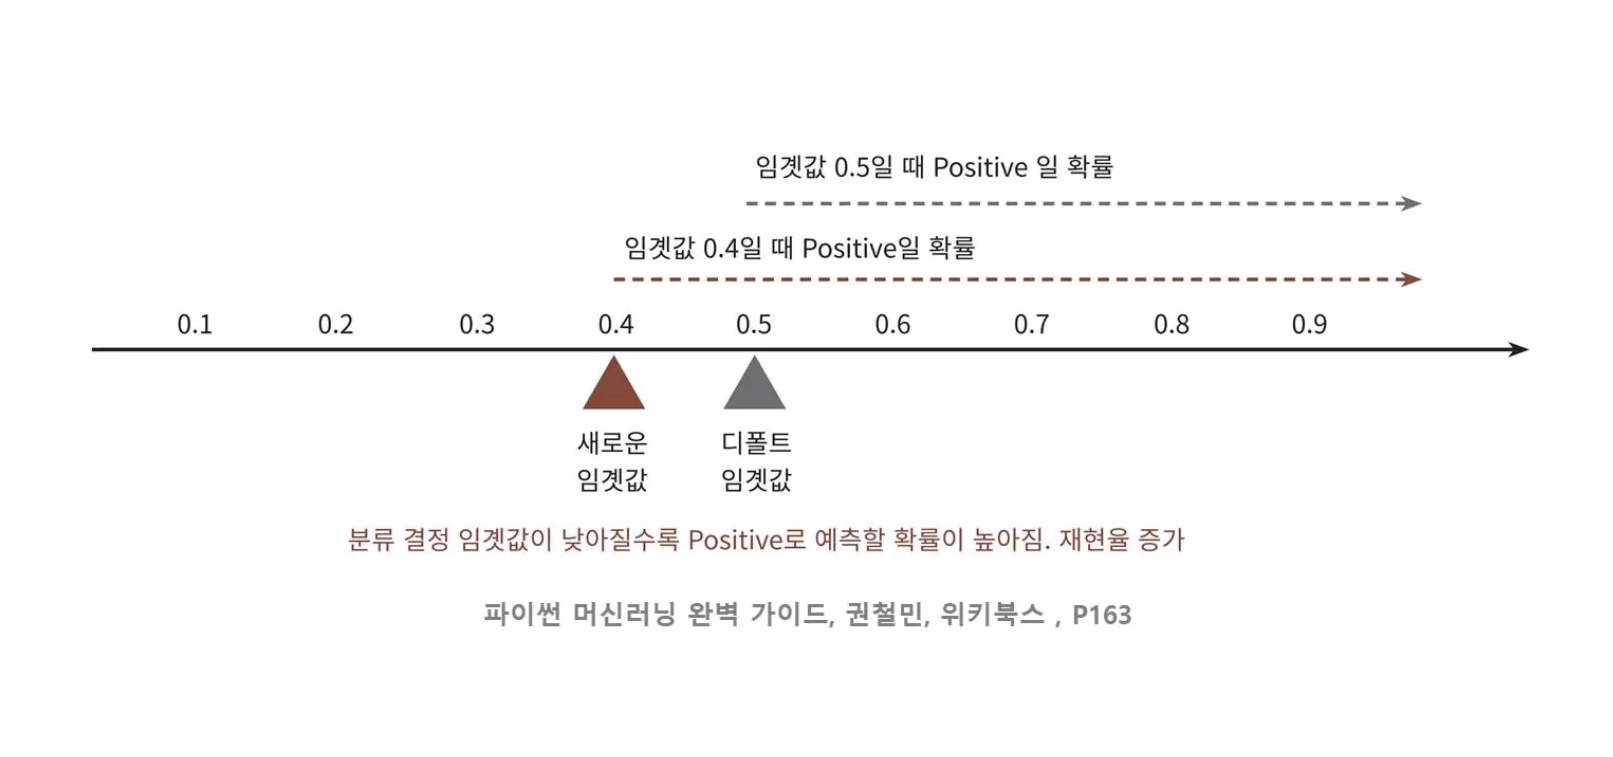

In [ ]:
# 그림21
양성 예측을 많이 하니까
실제 양성을 음성으로 예측하는 회수가 상대적으로 줄어듦


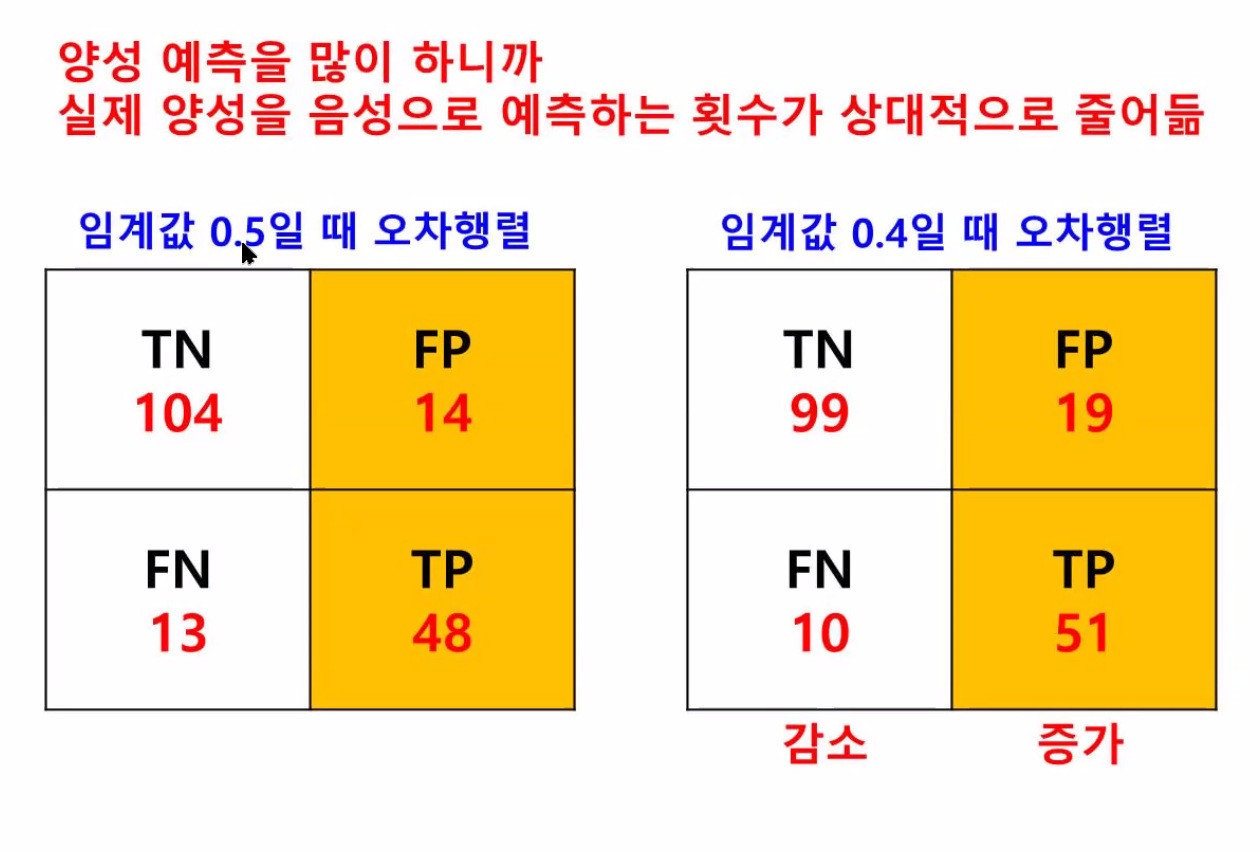

### 여러 개의 분류 결정 임계값을 변경하면서 Bin arizer를 이용하여 예측값 변환

In [93]:
# 테스트를 수행할 모든 임계값 리스트 생성
thresholds=[0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds 리스트 값을 차례로 반복하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        
        print('\n임계값 : ', custom_threshold)
        
        #위에서 만든 평가 함수 호출
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

#결과
#정밀도/재현율 트레이드 오프
#한 쪽을 향상시키려면 다른 수치가 감소하니까 적당한 수치를 선택해야 함
#재현율을 높이려면 임계값 0.45가 적당하다 

#0.4일때 재현율이 더 높지만 정밀도가 너무 낮으니까
#정밀도를 약간 높여서 임계값이 0.45를 선택

#그 이상은 재현율이 너무 낮아짐


임계값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도:0.7183, 재현율:0.8361

임계값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도:0.7656, 재현율:0.8033

임계값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도:0.7742, 재현율:0.7869

임계값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도:0.8364, 재현율:0.7541

임계값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도:0.8824, 재현율:0.7377


In [ ]:
#결과
#정밀도/재현율 트레이드 오프
#한 쪽을 향상시키려면 다른 수치가 감소하니까 적당한 수치를 선택해야 함
#재현율을 높이려면 임계값 0.45가 적당하다 

#0.4일때 재현율이 더 높지만 정밀도가 너무 낮으니까
#정밀도를 약간 높여서 임계값이 0.45를 선택

#그 이상은 재현율이 너무 낮아짐

In [ ]:
# 재현율 80%선에서 유지하고 정밀도 너무낮은것보다는 저정도가 나아보인다 임계값0.45정도가
# 괜찮아보인다고??

In [ ]:
# 어떤걸 다루느냐에 따라 달라짐,,나중에

재현율과 임계값이 어떻게 변화하고 바뀌는지 그래프한번 그려서 보기

### precision_recall_curve() 이용하여 임계값에 따른 정밀도-재현율 값 추출 

In [ ]:
precision_recall_curve(실제값, 레이블 값이 1일 때의 예측 확률값)
- 정밀도, 재현율, 임계값을 ndarray로 반환
- 임계값 : 일반적으로 0.11 ~ 0.95 범위 
- 정밀도 재현율의 임계값에 따른 값 변화를 구선 형태의 그래프로 시각화하는데 이용

예제
- 반환되는 임계값이 너무 작은 값 단위로 많이 구성되어 있음http://cdnimg.melon.co.kr/svc/user_images/user/390/40/38939277_194.jpg?tm=20210413193407
- 반환 임계값의 데이터 143건인데 
- 임계값을 15단계로 해서 샘플로 10건만 추출
- 좀 더 큰 값의 임계값과 그때의 정밀도/재현율 확인


In [94]:
from sklearn.metrics import precision_recall_curve

In [99]:
# 레이블 값이 1일때의 예측 확률 추출
prd_proba_class1=lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve() 인자로 입력
precisions, recalls, thresholds=precision_recall_curve(y_test, prd_proba_class1)

print('반환된 분류 결정 임계값 배열의 shape: ', thresholds.shape)
print('반환된 precisions 배열의 shape: ', precisions.shape)
print('반환된 recalls 배열의 shape: ', recalls.shape)

print('\nthresholds 5 sample : ', thresholds[:5])
print('precisions 5 sample : ', precisions[:5])
print('recalls 5 sample : ', recalls[:5])

반환된 분류 결정 임계값 배열의 shape:  (143,)
반환된 precisions 배열의 shape:  (144,)
반환된 recalls 배열의 shape:  (144,)

thresholds 5 sample :  [0.10384989 0.10385209 0.10387677 0.10798906 0.10881933]
precisions 5 sample :  [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample :  [1.         0.98360656 0.98360656 0.98360656 0.96721311]


In [107]:
import numpy as np 

# 반환됨 임계값 배열 행위 143건으로
# 임계값을 15단계로 해서 샘플로 10건 추출
thr_index=np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(  thresholds[thr_index],2 ) )

샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 :  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [109]:
# 15단계 단위로 추출된 임계값에 따른 정밀도와 재현율 값 출력
print('샘플 임계값 정밀도 : ', np.round(precisions[thr_index],3))
print('샘플 임계값 재현율 : ', np.round(recalls[thr_index],3))

샘플 임계값 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [110]:
import numpy as np 

# 반환됨 임계값 배열 행위 143건으로
# 임계값을 15단계로 해서 샘플로 10건 추출
thr_index=np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(  thresholds[thr_index],2 ) )
# 15단계 단위로 추출된 임계값에 따른 정밀도와 재현율 값 출력
print('샘플 임계값 정밀도 : ', np.round(precisions[thr_index],3))
print('샘플 임계값 재현율 : ', np.round(recalls[thr_index],3))

샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 :  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [ ]:
# 결과 
# 임계값이 증가할수록 
# 정밀도 값은 같이 높아지지만 
# 재현율 값은 낮아짐

### 임계값의 변화에 따른 정밀도-재현율 변환 곡선을 그래프로 표현

In [132]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, prd_proba_class1)
    
    # X축을 thresholds 값, Y축은 정밀도, 재현율 값으로 각각 Plot 수행
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # (143, 0)에서 143 추출
    
    # thresholds는 143이고, precisions과 recalls는 144로 X축과 Y축 값의 개수 가 맞이 낳으므로
    # 이 precisions과 recalls 갓으로 그래프를 그리면 오류 발생
    # y 값을 [0:threshold_boundary]로 143개 추출해서 X축 개수와 맞춤
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scaledmf 0.1 단위로 변경
    # xlim() : X축 범위를 지정하거나 반환
    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()
    

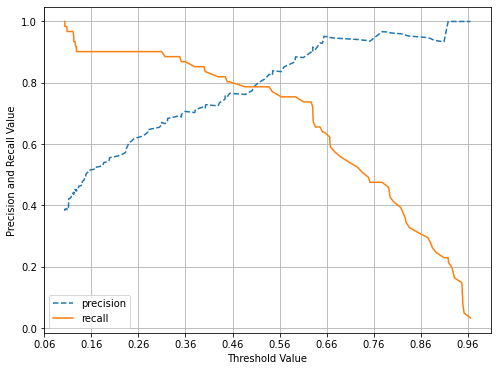

In [133]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [ ]:
# 그래프 결과
임계값이 낮을수록 양성 예측 수의 증가로
재현율 값이 극도로 높아지고
정밀도 값은 극도로 낮아짐
임계값을 계속 증가시킬수록 재현율 값이 낮아지고
정밀도는 높아지는 반대 양상

In [ ]:
정밀도와 재현율 조합
- Positive 예측의 임계값에 따라 정밀도와 재현율 수치가 변경
- 임계값은 업무 환경에 맞춰 정밀도와 재현율의 수치를 상호 보완할 수 있는 수준에서 적용
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안됨

- 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해
- 각 예측 상황에 맞는 분류 알고리즘을 튜닝할 수는 있지만
- 정밀도와 재현율 성능 수치를 어느 한쪽만 참조하면 극단적인 수치 조작이 가능하다


정밀도를 100%로 만드는 법 
- 확실한 기준이 되는 경우만 Positive로 예측하고
- 나머지는 모두 Negative로 예측한다
- 전체 환자 1,000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 가정하면
- 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측할 경우
- 정밀도 = TP(FP+TP)에서 
- FP는 0, TP는 1
- 정밀도는 1/(0+1)=1로 100%가 됨


분류의 종합적인 성능 평가에 사용하기 위해서는
정밀도와 재현율의 수치를 적절하게 조합하는 것이 필요함

# F1 score

F1 score
- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때
- 높은 값을 가짐


# 그림22
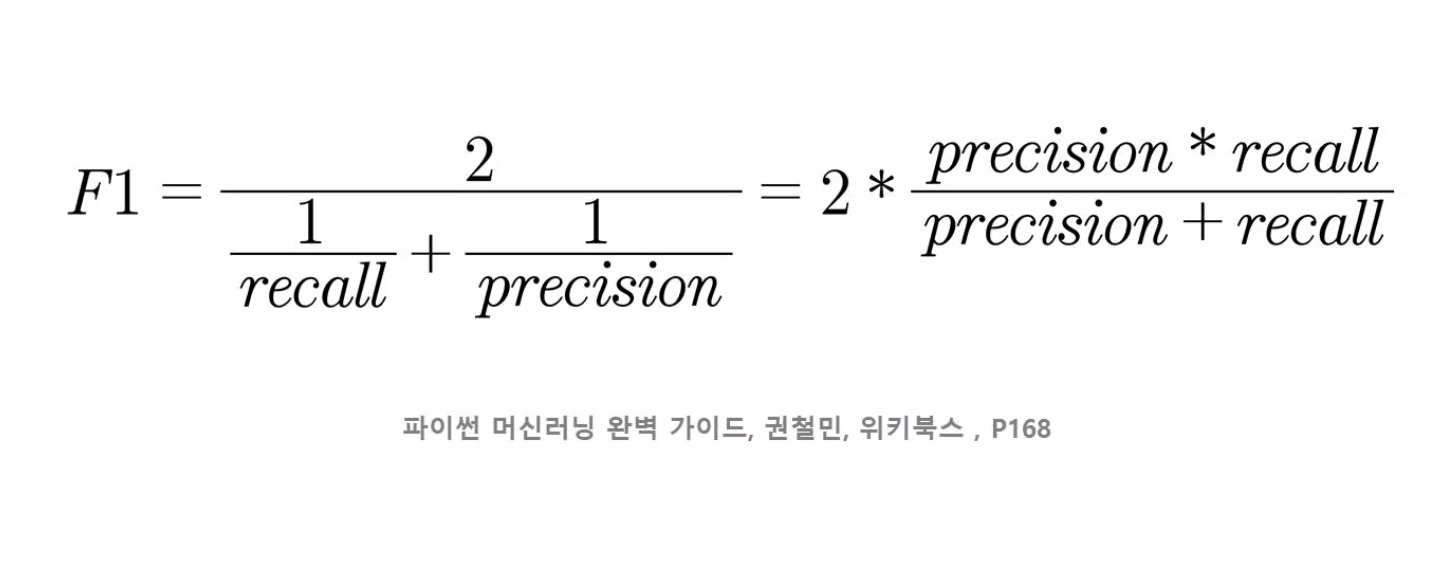

In [ ]:
예 : 2개의 예측 모델 비교 
    
A 예측 모델
- 정밀도 : 0.9
- 재현율 : 0.1 (극단적 차이)
- F1 스코어 : 0.18
    
B 예측 모델
- 정밀도 : 0.5
- 재현율 : 0.5 (극단적 차이)
- F1 스코어 : 0.5
    
B 모델의 F1 스코어가 A 모델에 비해 매우 우수


In [136]:
# 사이킷런의 F1 스코어 API f1_score()
from sklearn.metrics import f1_score

f1=f1_score(y_test,pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7805


In [ ]:
타이타닉 생존자 예측에서 임계값을 변화시키면서
F1 스코어를 포함한 평가 지표 구하기

In [146]:
def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred) # 오차행렬
    accuracy=accuracy_score(y_test, pred)    # 정확도
    precision=precision_score(y_test,pred)   # 정밀도
    recall=recall_score(y_test, pred)        # 재현율
    
    # F1 스코어 추가
    f1=f1_score(y_test,pred)
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도 : {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
# 임계값을 0.4~0.6 별로 정확도, 정밀도, 재현율, F1 스코어 확인
thresholds=[0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1),thresholds)


임계값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도:0.7183, 재현율:0.8361, F1:0.7727

임계값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도:0.7656, 재현율:0.8033, F1:0.7840

임계값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도:0.7742, 재현율:0.7869, F1:0.7805

임계값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도:0.8364, 재현율:0.7541, F1:0.7931

임계값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도:0.8824, 재현율:0.7377, F1:0.8036




### ROC Curve와 AUC 

ROC 곡선 
- FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선
- 양성으로 잘못 판단한 것에 대한 진짜 양성의 비율을 나타내는 곡선

ROC(Receiver Operation Characterisic Curve)
- 임계값을 1부터 0까지 변화시키면서 FPR(X축)을 구하고
- FPR(X축)의 변화에 따른 TPR(Y축)을 구하는 곡선
- 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 평가 지표

TPR(True Positie Rate) : 재현율(민감도)
- 실제 Positive를 Positive로 예측한 비율
- 질병이 있는 사람을 질병이 있는 것으로 양성 판정
- 값이 클수록 좋음 (양성을 잘 예측)

FPR(False Positive Rate)
- 실제는 Negative인데 Positive로 잘못 예측한 비율
- 1 - 특이성

TNR(True Negative Rate) : 특이성 (Specificity)
- 실제 음성인데 음성으로 예측한 비율
- 질병이 없는 사람을 질병이 없는 것으로 음성 판정
- 값이 클수록 좋음 (음성을 잘 예측)


ROC(Rsceiver Operation Characterisic Curve)
- 임계값을 1부터 0까지 변화시키면서 FPR(X축)을 구하고 
- FPR(X축)의 변화에 따른 TPR(Y축)을 구하는 곡선
- 머신러닝의 이진분류 모델의 예측 성능을 판단하는 평가 지표로 사용됨 


TPR(True Positive Rate) : 재현율(민감도)
- 실제 Positive를 Positive로 예측한 비율 
- 질병이 있는 사람을 질병이 있는 것으로 양성 판정함
- 값이 클수록 좋음 (양성을 잘 예측하는것이므로)

FPR(False Positive Rate) 
- 실제는 Negative인데 Positive로 잘못 예측한 비율
- 1 - 특이성

TNR(True Negative Rate) : 특이성(Specificity)
- 실제 음성인데 음성으로 예측한 비율
- 질병이 없는 사람을 질병이 없는 것으로 음성 판정함
- 값이 클수록 좋음 (음성을 잘 예측했기 때문에)



# 그림23
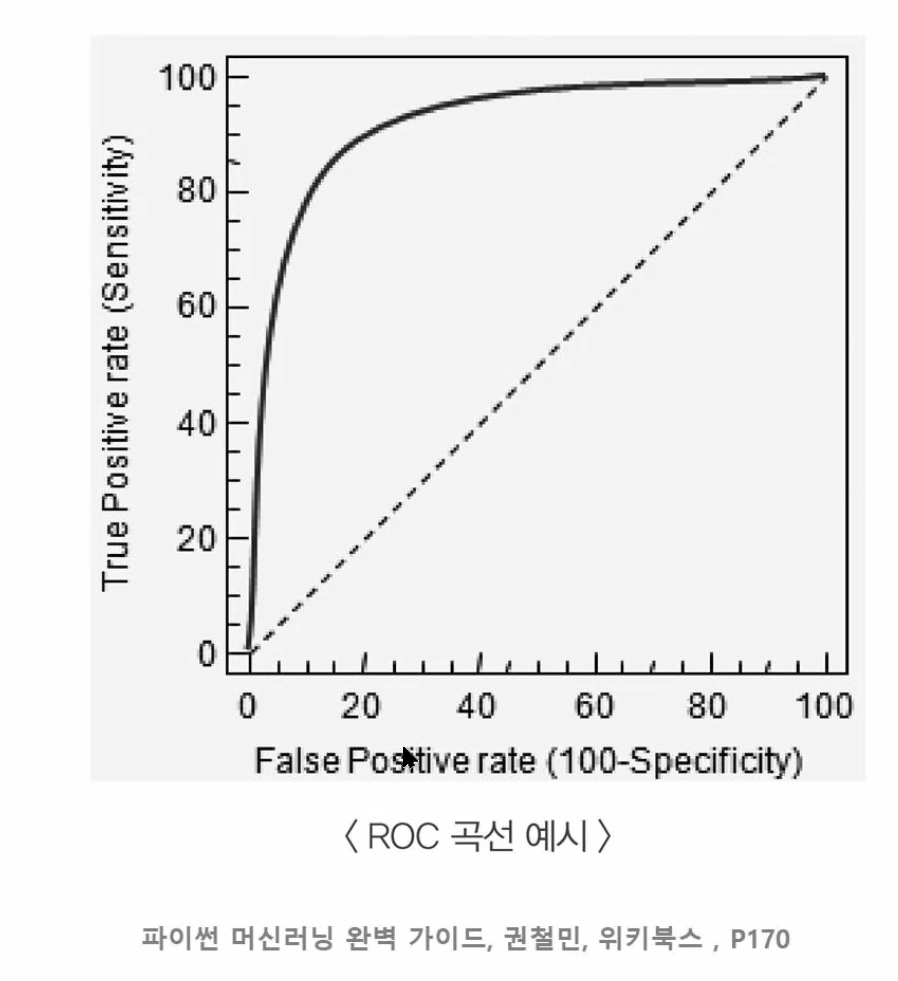

사이킷런의 roc_curve() APi 이용해서
타이타닉 생존자 예측 모델의 FPR, TPR, 임계값 구하기

정밀도와 재현율에서 학습한 LogisticRegression의 predic_proba() 결과 이용

roc_curve(실제 데이터, 예측 확률)
- FPR, TRP, thresholds 반환


In [153]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률 추출
prd_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, prd_proba_class1)

thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플임계값 : ', np.round(thresholds[thr_index], 2))

# 5단계 단위로 추출된 임계값에 따른 FPR, TPR 값 출력
print('샘플 임계값 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값 TPR : ', np.round(tprs[thr_index], 3))

# 결과
# 임계값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐
# FPR이 조금씩 커질 때 TPR은 가파르게 증가


샘플 추출을 위한 임계값 배열의 index :  [ 0  5 10 15 20 25 30 35 40 45 50]
샘플임계값 :  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임계값 FPR :  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임계값 TPR :  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


In [ ]:
#결과
#임계값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐
#FPR이 조금씩 커질 때 TPR은 가파르게 증가함

In [ ]:
#FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

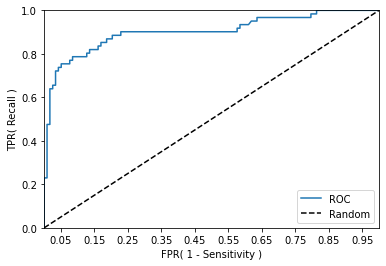

In [154]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


# 그래프 설명
일반적으로 곡선 자체는 RPR과 TPR의 변화값을 보는데 이용하고
분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정 
AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로
일반적으로 1에 가까울수록 좋다 
AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할 수록 
직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는
좋은 ROC AUC 성능 수치를 얻게 됨 
가운데 직선은 랜덤 수준의 이진 분류 AUC 값으로 0.5
따라서 보통의 분류는 0.5이상의 AUC 값을 가짐 

In [157]:
# 타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값 확인

from sklearn.metrics import roc_auc_score

prd_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test,prd_proba)

print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9025
